# Import Library

In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from  sklearn.linear_model import LogisticRegression
from  sklearn.model_selection import train_test_split
from  sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
from  sklearn.metrics import classification_report, accuracy_score
from  sklearn.metrics import roc_curve,roc_auc_score

import warnings
warnings.filterwarnings("ignore")

# 1.Problem statement

In [ ]:
To predict person is survived or not using variuos variables

# 2.Data Gathering

In [2]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 3.EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df['PassengerId'].nunique()

891

In [5]:
df['Name'].nunique()

891

In [6]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Gender           2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
column_list=['PassengerId','Name','Ticket','Cabin']

df.drop(column_list,axis=1,inplace=True)

In [9]:
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [10]:
df['Gender'].value_counts()

male      577
female    314
Name: Gender, dtype: int64

In [11]:
df['Gender'].replace({'male':0,'female':1},inplace=True)

In [12]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
df_embarkes = pd.get_dummies(df["Embarked"])
df_embarkes

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [14]:
df= pd.concat([df,df_embarkes],axis=1)

In [15]:
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,0,22.0,1,0,7.2500,S,0,0,1
1,1,1,1,38.0,1,0,71.2833,C,1,0,0
2,1,3,1,26.0,0,0,7.9250,S,0,0,1
3,1,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,0,35.0,0,0,8.0500,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,0,0,1
887,1,1,1,19.0,0,0,30.0000,S,0,0,1
888,0,3,1,NaN,1,2,23.4500,S,0,0,1
889,1,1,0,26.0,0,0,30.0000,C,1,0,0


In [16]:
df.drop("Embarked",axis=1,inplace=True)

In [17]:
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,0,1
887,1,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,1,NaN,1,2,23.4500,0,0,1
889,1,1,0,26.0,0,0,30.0000,1,0,0


In [18]:
df.describe()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,C,Q,S
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.386083,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783
std,0.487123,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [19]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [20]:
df.isna().sum()

Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
C           0
Q           0
S           0
dtype: int64

In [21]:
df["Survived"].value_counts()

0    547
1    344
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

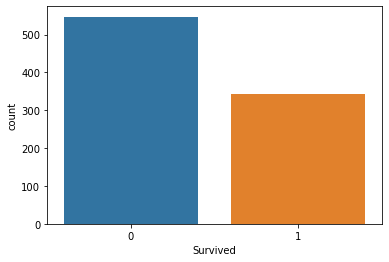

In [22]:
sns.countplot(x="Survived",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

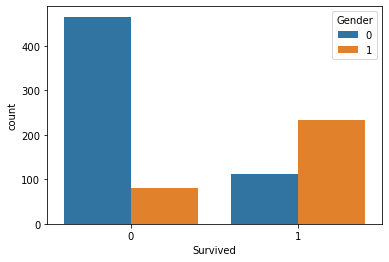

In [23]:
sns.countplot(x="Survived",hue="Gender",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

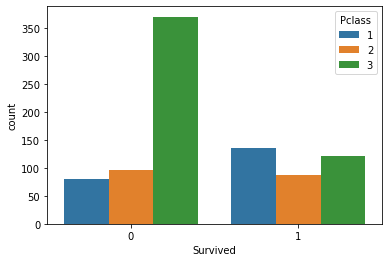

In [24]:
sns.countplot(x="Survived",hue="Pclass",data=df)

<AxesSubplot:>

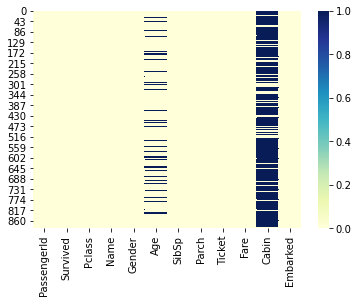

In [27]:
df1 = pd.read_csv("titanic.csv")
df1.isna()
sns.heatmap(df1.isna(),cmap="YlGnBu")

# feature selection

In [28]:
x = df.drop("Survived",axis=1)
y = df['Survived']


In [29]:
y.value_counts()

0    547
1    344
Name: Survived, dtype: int64

In [30]:
334/(344+547)

0.37485970819304154

In [31]:
547/(344+547)

0.6139169472502806

In [32]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=42)

In [33]:
y_train.value_counts()

0    413
1    255
Name: Survived, dtype: int64

In [35]:
255/(413+255)

0.38173652694610777

In [36]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)

In [37]:
y_train.value_counts()

0    410
1    258
Name: Survived, dtype: int64

In [38]:
258/(258+410)

0.38622754491017963

In [39]:
y_test

304    0
566    0
104    0
345    1
441    0
      ..
837    0
295    0
381    1
155    0
627    1
Name: Survived, Length: 223, dtype: int64

# Model Building

In [42]:
lr_clf = LogisticRegression()
lr_clf.fit(x_train,y_train)

LogisticRegression()

# Evaluation

In [46]:
y_pred = lr_clf.predict(x_test)
y_pred[20:25]  # Y predicted

array([0, 0, 1, 1, 0], dtype=int64)

In [47]:
y_test[20:25] # y actual

288    1
21     1
139    0
556    1
562    0
Name: Survived, dtype: int64

# Accuracy

In [49]:
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",cnf_matrix)

Confusion matrix:
 [[112  25]
 [ 25  61]]


In [ ]:
    Actual values
    P    N
P  TP   FP
N  FN   TN

    Actual values
    1    0
1  TP   FP
0  FN   TN

# Sklearn Confusion matrix

    Predicted values
    0    1
0  TN   FP
1  FN   TP

[[112  25]
 [ 25  61]]

Precision = TP/(TP+FP)

In [50]:
#Precision = TP/(TP+FP)
Precision = 61/(61+25)
Precision

0.7093023255813954

In [55]:
Precision = 112/(112+25)
Precision

0.8175182481751825

In [51]:
#Recall = TP/(TP+FN)
Recall = 61/(61+25)
Recall

0.7093023255813954

In [56]:
Recall = 112/(112+25)
Recall

0.8175182481751825

In [52]:
#Accuracy = (TP+TN)/(TP+TN+FP+FN)
Accuracy = (61+112)/(61+112+25+25)
Accuracy

0.7757847533632287

In [53]:
accuracy_score(y_test,y_pred)

0.7757847533632287

In [54]:
clf_report = classification_report(y_test,y_pred)
print("classification_report is :\n",clf_report)

classification_report is :
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       137
           1       0.71      0.71      0.71        86

    accuracy                           0.78       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.78      0.78      0.78       223



In [57]:
y_pred_prob = lr_clf.predict_proba(x_test)
y_pred_prob

array([[0.90255512, 0.09744488],
       [0.86174336, 0.13825664],
       [0.96105511, 0.03894489],
       [0.16261247, 0.83738753],
       [0.86652504, 0.13347496],
       [0.19068892, 0.80931108],
       [0.06154408, 0.93845592],
       [0.30219429, 0.69780571],
       [0.74037399, 0.25962601],
       [0.8617731 , 0.1382269 ],
       [0.84597772, 0.15402228],
       [0.23668509, 0.76331491],
       [0.91003278, 0.08996722],
       [0.87066489, 0.12933511],
       [0.92650937, 0.07349063],
       [0.1687689 , 0.8312311 ],
       [0.93514036, 0.06485964],
       [0.76533595, 0.23466405],
       [0.28633404, 0.71366596],
       [0.87045729, 0.12954271],
       [0.85469919, 0.14530081],
       [0.80527162, 0.19472838],
       [0.32279282, 0.67720718],
       [0.1269251 , 0.8730749 ],
       [0.76028882, 0.23971118],
       [0.05447167, 0.94552833],
       [0.33052709, 0.66947291],
       [0.47682533, 0.52317467],
       [0.32893165, 0.67106835],
       [0.18114211, 0.81885789],
       [0.

In [58]:
y_pred[-5:]

array([0, 1, 1, 0, 1], dtype=int64)

In [ ]:
       [0.90255512, 0.09744488], >> class 0
       [0.38736419, 0.61263581], >> class 1
       [0.11638248, 0.88361752], >> class 1
       [0.62985173, 0.37014827], >> class 0
       [0.04899959, 0.95100041]] >> class 1

In [59]:
y_pred_prob[:,1]

array([0.09744488, 0.13825664, 0.03894489, 0.83738753, 0.13347496,
       0.80931108, 0.93845592, 0.69780571, 0.25962601, 0.1382269 ,
       0.15402228, 0.76331491, 0.08996722, 0.12933511, 0.07349063,
       0.8312311 , 0.06485964, 0.23466405, 0.71366596, 0.12954271,
       0.14530081, 0.19472838, 0.67720718, 0.8730749 , 0.23971118,
       0.94552833, 0.66947291, 0.52317467, 0.67106835, 0.81885789,
       0.81195022, 0.18712719, 0.91260668, 0.1185712 , 0.14837014,
       0.13135927, 0.73523438, 0.84770262, 0.01071986, 0.30452942,
       0.13085902, 0.65830357, 0.13632419, 0.21628721, 0.77411178,
       0.30668465, 0.05299271, 0.12745769, 0.15304013, 0.05969643,
       0.24763781, 0.48416211, 0.6967734 , 0.71108118, 0.73848399,
       0.08585804, 0.09741686, 0.24678634, 0.68459763, 0.34720319,
       0.28249806, 0.27097748, 0.07654664, 0.52923838, 0.04858072,
       0.1164674 , 0.67106835, 0.07579217, 0.12954271, 0.10789506,
       0.01071986, 0.10005247, 0.09741686, 0.28787108, 0.23067

In [60]:
fpr,tpr,thresh = roc_curve(y_test,y_pred_prob[:,1])

In [63]:
thresh

array([1.97261693, 0.97261693, 0.9657275 , 0.93162208, 0.92804258,
       0.84770262, 0.83738753, 0.80444208, 0.78954286, 0.7758321 ,
       0.77411178, 0.73848399, 0.73523438, 0.7020519 , 0.67124508,
       0.67112728, 0.67106835, 0.65830357, 0.6480442 , 0.64650746,
       0.62800239, 0.6262752 , 0.61409369, 0.61263581, 0.59946053,
       0.59678482, 0.56946886, 0.55111567, 0.54832064, 0.53286949,
       0.52923838, 0.48764784, 0.48416211, 0.48246996, 0.44211173,
       0.4207244 , 0.39661605, 0.37014827, 0.34720319, 0.34533464,
       0.33535379, 0.28189809, 0.27932677, 0.25962601, 0.25351698,
       0.24763781, 0.24678634, 0.2385832 , 0.23466405, 0.23454818,
       0.21979168, 0.19472838, 0.15402228, 0.15384288, 0.15384175,
       0.15304013, 0.14929145, 0.14530081, 0.13085902, 0.12954271,
       0.11812701, 0.1164674 , 0.10544196, 0.10118579, 0.0986234 ,
       0.09770872, 0.09744488, 0.09741686, 0.09731093, 0.09729959,
       0.09389375, 0.08305977, 0.0830106 , 0.08298635, 0.08297

# ROC Curve

Text(0, 0.5, 'True Positive Rate')

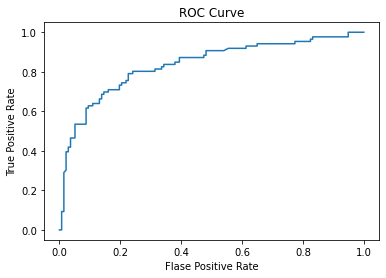

In [67]:
plt.title("ROC Curve")
plt.plot(fpr,tpr)
plt.xlabel("Flase Positive Rate")
plt.ylabel("True Positive Rate")